# Ссылка на презентацию: 
https://drive.google.com/file/d/1TlaXVG6F1JP3jUBmWx3vO4LUzJPhVekg/view?usp=sharing

In [1]:
# Адаптируем размер тетрадки
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

<a id='31-bullet'></a>

<b> Название проекта: </b>
    
Анализ товарного ассортимента магазина товаров для дома «Пока все ещё тут»

<b> Цель проекта: </b>

На основании анализа товарного ассортимента определить какие категории товаров следует увеличить а какие уменьшить в стоке.


    
В данном исследовании представлены данные описывающие транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».
    

<b> Данное исследование разделим на несколько частей:<b/>

##### Часть 1. Изучение общей информации:
* [1. Изучение файлов с данными, получение общей информации, загрузка библиотек.](#1-bullet)
* [2. Промежуточные выводы](#1.2-bullet)

##### Часть 2. Подготка данных:
* [1. Преобразование данных в нужные типы.](#2.1-bullet)
* [2. Работа с дубликатами в данных.](#2.2-bullet)
* [3. Работа с выбросами](#2.3-bullet)
* [4. Промежуточные выводы](#2.4-bullet)

##### Часть 3. Исследовательский анализ данных (EDA): 
* [1. Леммантизация и группировка продуктов](#3.1-bullet)  
* [2. Посмотрим на динамику продаж групп товаров во времени](#3.2-bullet)    
* [3. Посмотрим на самые популярные продукты по заказам](#3.3-bullet)
* [4. Как распределены товары по чекам?](#3.4-bullet)
* [5. Посмотрим на отношение количества покупок товара к доходу.](#3.5-bullet) 
* [6. Посмотрим на отношение количества покупок категории товара к доходу.](#3.6-bullet)
* [7. Как сезонность влияет на продажи?](#3.7-bullet)
* [8. Посмотрим на самые популярные товары по категориям.](#3.8-bullet)
* [9. Разбор аномальных значении](#3.9-bullet)   
* [10. Промежуточные выводы:](#3.10-bullet)


##### Часть 4. Кластеризация товаров:
* [1. Стандартизируем данные.](#4.1-bullet)
* [2. Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.](#4.2-bullet)
* [3. Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры товаров.](#4.3-bullet)
* [4. Для каждого полученного кластера посчитаем и сравним средние значения.](#4.4-bullet)
* [5. Промежуточные выводы:](#4.5-bullet)

    
##### Часть 5. Проверка гипотез:
* [1. Посчитаем статистическую значимость различии в среднем чеке по кластерам](#5.1-bullet)
* [2. Посчитаем статистическую значимость различии количестве продаж по кластерам](#5.2-bullet)
* [3. Промежуточные выводы:](#5.3-bullet)
    
##### Часть 6. Общий вывод:
* [1. Общий вывод и рекомендации.](#6-bullet)  
   

  
<b> Описание данных проекта:</b>
    
Колонки в  ecommerce_dataset.csv :
- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

<a id='1-bullet'></a>
# Часть 1. Изучение общей информации:

In [2]:
# импортируем библиотеки
import pandas as pd
import datetime as dt

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import re
import nltk
import itertools

from scipy import stats as st

from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage 

In [3]:
# увеличим лимит по выводу информации
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

In [5]:
try:
    df = pd.read_csv('/datasets/ecommerce_dataset.csv')
except:
    df = pd.read_csv('ecommerce_dataset.csv')

In [6]:
# посмотрим на данные
df.info()
display(df.head(15))
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0
5,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0
6,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0
7,2018100108,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0
8,2018100108,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С61...",1,269.0
9,2018100109,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beig...,1,674.0


,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


In [7]:
# приведем названия столбцов к нижнему регистру
df.columns = df.columns.str.lower()
df['product'] = df['product'].str.lower()

In [8]:
# Проверка на явные дубликаты:
print(df.duplicated().sum())

0


In [9]:
# проверим на возможные дубликаты по столбцам
df_dup_id_all = df[['customer_id', 'order_id', 'product']].duplicated().sum()
print('Общие дубликаты:', df_dup_id_all)

customer_id_dup = df[['customer_id', 'product']].duplicated().sum()
print('Дубликаты по customer_id:', customer_id_dup)

order_id_dup = df[[ 'order_id', 'product']].duplicated().sum()
print('Дубликаты по order_id:', order_id_dup)

Общие дубликаты: 1886
Дубликаты по customer_id: 2001
Дубликаты по order_id: 1920


In [10]:
# отношение дубликатов к общему количеству данных
print('Процент общих дубликатов для id: {}%'.format(round((df[['customer_id', 'order_id', 'product']].duplicated().sum() / df['order_id'].count())*100)))
print('Процент дубликатов для покупателей: {}%'.format(round((df[['customer_id', 'product']].duplicated().sum() / df['order_id'].count())*100)))
print('Процент дубликатов для заказов: {}%'.format(round((df[['order_id', 'product']].duplicated().sum() / df['order_id'].count())*100)))

Процент общих дубликатов для id: 28%
Процент дубликатов для покупателей: 30%
Процент дубликатов для заказов: 28%


In [11]:
print('количество товаров:')
df['product'].nunique()

количество товаров:


2341

In [12]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


<a id='1.2-bullet'></a>
## Промежуточные выводы:

<b>
В нашем датасете имеем 6737 записей разделенные на 6 колонок. Есть большое количество дубликатов. Нужно привести дату в правильный тип данных.

<a id='2.1-bullet'></a>
# Часть 2. Подготка данных:

<a id='2.1-bullet'></a>
## Преобразование данных в нужные типы.

In [13]:
# Преобразуем дату и добавим нужные столбцы
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d%H")

df["hour"] = df["date"].dt.hour
df["day"] = df["date"].dt.day
df["week"] = df["date"].dt.isocalendar().week
df["month"] = df["date"].dt.month
df["year"] = df["date"].dt.year

<a id='2.2-bullet'></a>
## Работа с дубликатами в данных.

In [14]:
# избавимся от общих дубликатов
df = df.drop_duplicates(subset=['customer_id', 'order_id', 'product',], keep='first', ignore_index = True)
df = df.drop_duplicates(subset=['customer_id', 'product',], keep='first', ignore_index = True)

In [15]:
# проверим если остались
df_dup_id_all = df[['customer_id', 'order_id', 'product']].duplicated().sum()
print('Общие дубликаты:', df_dup_id_all)

customer_id_dup = df[['customer_id', 'product']].duplicated().sum()
print('Дубликаты по customer_id:',customer_id_dup)

# Дубликаты по id заказа трогать не будем так как у одного покупателя могут быть несколько заказов.

Общие дубликаты: 0
Дубликаты по customer_id: 0


In [16]:
# Добавим столбец с доходом с товара
df['income'] = df['price']*df['quantity']

<a id='2.3-bullet'></a>
## Работа с выбросами.

In [17]:
print('1% количества товара больше: {}'.format(df['quantity'].quantile(.99)))
display(df[df['quantity']> df['quantity'].quantile(.99)])
print('1% товара дороже: {}'.format(df['price'].quantile(.99)))
display(df[df['price']> df['price'].quantile(.99)])

1% количества товара больше: 30.0


,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income
13,2018-10-01 15:00:00,0948b0c2-990b-4a11-b835-69ac4714b21d,68486,крючок одежный 2-х рожковый серый металлик с п...,96,38.0,15,1,40,10,2018,3648.0
138,2018-10-08 15:00:00,9151d307-654c-4239-a888-ada5ca45f0b2,68571,набор вешалок для костюма 45см 4шт цвет: кремо...,37,202.0,15,8,41,10,2018,7474.0
146,2018-10-09 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68580,"стяжка оконная с болтом ст-55 цинк, 1108354",64,19.0,9,9,41,10,2018,1216.0
197,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,"крепеж для пружины дверной, 1107055",150,19.0,14,11,41,10,2018,2850.0
198,2018-10-11 14:00:00,cd09ea73-d9ce-48c3-b4c5-018113735e80,68611,пружина дверная 240 мм оцинкованная (д-19 мм) ...,150,38.0,14,11,41,10,2018,5700.0
219,2018-10-12 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68623,"петля приварная гаражная d 14х90 мм с шаром, 1...",50,38.0,15,12,41,10,2018,1900.0
252,2018-10-17 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,щетка для посуды *мила* sv3182 1807009,50,27.0,11,17,42,10,2018,1350.0
253,2018-10-17 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68668,"щетка-утюжок с ручкой миди, standart, york, g1126",50,44.0,11,17,42,10,2018,2200.0
474,2018-11-01 08:00:00,aa42dc38-780f-4b50-9a65-83b6fa64e766,68815,муляж яблоко 9 см красное,170,51.0,8,1,44,11,2018,8670.0
491,2018-11-02 11:00:00,0c5aaa88-e346-4f87-8f7a-ad8cbc04e965,68831,муляж яблоко 9 см красное,140,59.0,11,2,44,11,2018,8260.0


1% товара дороже: 4954.199999999997


,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income
93,2018-10-04 17:00:00,d1a13243-9111-454f-848c-dcce0958528c,68529,сумка-тележка хозяйственная andersen scala sho...,1,5024.0,17,4,40,10,2018,5024.0
498,2018-11-02 17:00:00,305c9634-ec53-46be-af05-48ee8bd790a5,68836,сумка-тележка хозяйственная andersen scala sho...,1,5249.0,17,2,44,11,2018,5249.0
536,2018-11-05 02:00:00,639c4989-b0ab-412a-b7ec-be394cb2d372,68856,сумка-тележка хозяйственная rolser imx005 mare...,1,6007.0,2,5,45,11,2018,6007.0
556,2018-11-05 22:00:00,fc333417-1d11-4a2a-b946-0957ae0603e9,68872,сумка-тележка хозяйственная rolser mou041 malv...,1,7597.0,22,5,45,11,2018,7597.0
641,2018-11-11 18:00:00,06e2fc7e-6183-4419-ada4-3b976baeed92,68952,коврик для ванной комнаты gobi полиэстер 120х7...,1,5474.0,18,11,45,11,2018,5474.0
960,2018-12-06 08:00:00,fa471f6f-1442-490c-acc6-a47b0822098c,69226,сумка-тележка хозяйственная andersen scala sho...,1,5249.0,8,6,49,12,2018,5249.0
965,2018-12-06 17:00:00,82b56a76-0dc9-4dae-aa76-863a9a80f082,69236,покрывало жаккард karna стеганое kalven 260x26...,1,6134.0,17,6,49,12,2018,6134.0
1013,2018-12-12 11:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,69320,сумка-тележка хозяйственная andersen treppenst...,1,5662.0,11,12,50,12,2018,5662.0
1061,2018-12-17 17:00:00,86c97bf1-c834-423e-9e38-8acda68f97e8,69417,гладильная доска leifheit airboard compact m p...,1,7424.0,17,17,51,12,2018,7424.0
1203,2018-12-29 09:00:00,ad66d870-22f5-43bc-958f-73420822586b,69681,сумка-тележка хозяйственная rolser pack gloria...,1,6307.0,9,29,52,12,2018,6307.0


In [18]:
# удалим выбросы
df = df[df['quantity']< df['quantity'].quantile(.99)]

In [19]:
# посмотрим на очищенные данные
df.info()
display(df.head(15))
print(df.describe())
print('Дата от {} до {}'.format(df['date'].min(), df['date'].max()))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4679 entries, 0 to 4735
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         4679 non-null   datetime64[ns]
 1   customer_id  4679 non-null   object        
 2   order_id     4679 non-null   int64         
 3   product      4679 non-null   object        
 4   quantity     4679 non-null   int64         
 5   price        4679 non-null   float64       
 6   hour         4679 non-null   int64         
 7   day          4679 non-null   int64         
 8   week         4679 non-null   UInt32        
 9   month        4679 non-null   int64         
 10  year         4679 non-null   int64         
 11  income       4679 non-null   float64       
dtypes: UInt32(1), datetime64[ns](1), float64(2), int64(6), object(2)
memory usage: 461.5+ KB


,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,0,1,40,10,2018,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,0,1,40,10,2018,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,0,1,40,10,2018,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,0,1,40,10,2018,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,0,1,40,10,2018,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,0,1,40,10,2018,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,0,1,40,10,2018,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,8,1,40,10,2018,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269.0,8,1,40,10,2018,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,9,1,40,10,2018,674.0


           order_id     quantity         price         hour          day  \
count   4679.000000  4679.000000   4679.000000  4679.000000  4679.000000   
mean   47992.557384     1.823680    519.857021    13.957470    15.414405   
std    27383.160139     2.770297    950.235228     4.811863     8.857736   
min    12624.000000     1.000000      9.000000     0.000000     1.000000   
25%    14770.000000     1.000000     90.000000    11.000000     8.000000   
50%    68844.000000     1.000000    150.000000    14.000000    15.000000   
75%    70790.500000     1.000000    509.000000    17.000000    23.000000   
max    73164.000000    29.000000  14917.000000    23.000000    31.000000   

              week        month         year        income  
count  4679.000000  4679.000000  4679.000000   4679.000000  
mean     26.606326     6.513144  2018.746741    650.723231  
std      14.280858     3.295901     0.434925   1195.981651  
min       1.000000     1.000000  2018.000000      9.000000  
25%      1

<a id='2.4-bullet'></a>
## Промежуточные выводы:

<b> Преобразовав и очистив данные, мы получили 4679 запись разделенные на 12 колонок. Имеем данный за период с 2018-10-01 по 2019-10-31. Есть выбивающиеся, но возможные значения. Принимаю решение их удалить, так как, хотя их меньше 1%, могут сильно повлиять на результаты.

<a id='3.1-bullet'></a>
# Часть 3. Исследовательский анализ данных (EDA):

## Леммантизация и группировка продуктов:

In [20]:

# Функция для очистки текста 
def clean_text(text):
    # приводим текст к нижнему регистру
    text = text.lower()
    # создаем регулярное выражение для удаления лишних символов
    regular = r'[\*+\#+\№\"\-+\+\=+\?+\&\^\.+\;\,+\>+\(\)\/+\:\\+]'
    # удаляем лишние символы
    text = re.sub(regular, '', text)
    # заменяем числа и цифры на ' NUM '
    text = re.sub(r'(\d+\s\d+)|(\d+)',' NUM ', text)
    # удаляем лишние пробелы
    text = re.sub(r'\s+', ' ', text)
    # возвращаем очищенные данные
    return text
 
# создаем список для хранения преобразованных данных 
processed_text = []
# загружаем стоп-слова для русского языка
stop_words = stopwords.words('russian')
# инициализируем лемматайзер 
lemmatizer = WordNetLemmatizer()
 
# для каждого значения text из столбца df['product']
for text in df['product']:
    # cleaning 
    text = clean_text(text)   
    # tokenization
    text = word_tokenize(text)       
    # удаление стоп-слов
    text = [word for word in text if word not in stop_words]     
    # лемматизация
    text = [lemmatizer.lemmatize(w) for w in text]
     
    # добавляем первое слово из преобразованного текста в список processed_text
    processed_text.append(text[0]+' '+text[1])
 
# Сохраняем результат преобразования в новой колонке 'Processed_msg'
df['processed_product'] = processed_text


In [21]:
# Посмотрим на уникальный названия продуктов
df['processed_product'].sort_values().unique()

array(['tepмокружка avex', 'автоматическая щетка', 'агератум рассада',
       'адиантум лиза', 'азалия индика', 'аквилегия махровая',
       'аквилегия обыкновенная', 'алиссум лобулярия', 'алиссум рассада',
       'алиссум скальный', 'алоэ вера', 'альбука спиралис',
       'амариллис red', 'анемона белый', 'антижир posh',
       'антинакипин утюгов', 'антуриум андрианум', 'антуриум тропик',
       'аптения d', 'арбуз волгоградец', 'арбуз огонек',
       'арбуз сибирские', 'арбуз холодок', 'арбуз шуга',
       'аргирантерум рассада', 'ароматизированное средство',
       'артемизия полынь', 'аспарагус d', 'аспарагус спренжери',
       'астра альпийская', 'астра рассада', 'афеляндра скуарроса',
       'бадан сердцелистный', 'базилик застольный', 'базилик зеленый',
       'базилик овощной', 'базилик пурпурные', 'базилик смесь',
       'бак белья', 'баклажан самурай', 'бакопа ампельная',
       'бальзам мытья', 'бальзамин валера', 'бальзамин новогвинейский',
       'банка крышкой', 'банка м

In [22]:
# Создадим словарь с категориями продуктов

category_dictionary = {
    
    'всё для дома':['бак','вакуумный','весы','петля','вешалк','вкладыш','корзина','короб','кофр', 'крючок','обувная','лоток','мусор','монетчатый','набор вешалок','котовник','петля', 
                'сумка','тележ','плечики','полки','решетка','тележка','хозяйственная','урна','этажерка','ящик','подставка','стеллаж','комод','карниз','этажерка','пуф','обув','светиль','фото',
               'для обув','защитный','обувница','светильник'],
    
    
    'кухня':['кипятильник','банка','бидон','блюд','ваза','вилка','разделочная','емкость','жестяная','измельчитель',
             'картофелемялка','кастрюля','кисточка','хлебница','интерьерный','кружка', 'крышка', 'кувшин', 'кухонн','столовая','чайная','холодца','мантоварка',
             'пароварка','масленка','мерный','стакан','миксер','мини-сковорода','мирт','миска','модульная', 
             'бокал','пикник','нож','webber','прибор', 'фужер','салатник', 'овсянница сизая','овощеварка','овощечистка','просеиватель','противень','разделочная','салфетка','сковорода',
             'скребок','соковарка','соковыжималка','тарелка', 'терка', 'термокружка','толкушка','фал','форма','хлебница','ложка','чай','электроштопор','сито', 
             'подставка для яйца'],
    
    'ванная':['ванн','вантуз','ведро','держатель','дозатор','ерш','коврик','ванной', 'ковш','мыльница','подголовник','пробка','унитаз'],
    
    'текстиль':['покрывало', 'подушка','скатерть','двуспальное','белье', 'кольца', 'штор', 'полотенце', 'ковер','халат','ковров', 'наволочка', 'наматрасник', 'одеяло', 'плед', 
                'подкладка', 'чехол','простын','скатерть','чехол','штора', 'покрывало'],
    
    'растения':['растен','а патио','адиантум','азалия','аквилегия','алиссум','амариллис','альбука','андесса','антижир',
           'арбуз','артемизия','аспарагус','астра','ахарница','бадан','базилик','бак','бальза','барвинок','бархатцы','бегония','буддлея', 'бузульник', 'валериана', 'вербена',
           'виола', 'газания', 'гвоздика','гардения', 'георгина', 'герань', 'гербера', 'гимнокалициум', 'гиностемма', 'гипсофила','годеция','горох','гортензия', 'декабрист','дендробиум', 
           'джункус', 'томата', 'диффенбахия','дыня', 'ель', 'чабер', 'замиокулькас', 'зверобой', 'земляника', 'змееголовник', 'импатиенс','иссоп','сантолина', 'кабачок', 'каланхое', 
           'календула', 'калибрахоа', 'калла', 'калоцефалус', 'камнеломка','кампанула', 'капуста', 'кипарисовик', 'клен',
           'колокольчик', 'кориандр','космея', 'крассула', 'крокусы','лаванда', 'мята', 'лантана', 'лапчатка','лен', 'литопс', 'порей', 'львиный', 'зев','любисток',
           'мединилла','мелисса', 'молодило', 'петрушка','морковь', 'настурция','незабудка','нолина', 'огурец', 'осина', 'орехоколка','патиссон','пахира', 'пеларгония', 
           'петрушка', 'петуни', 'подвесное', 'цветов','портулак', 'примула', 'пуансеттия','радермахера', 'роза','розмарин','рудбекия','скиммия', 'спатифиллум','суккулент',
           'сциндапсус', 'тимьян','томат', 'тортница', 'тюльпан', 'рассада', 'ранункулус','тыква', 'фаленопсис','фиалка', 'фикус', 'фиттония', 'флокс', 'фуксия', 'хризантема', 
           'целозия', 'цикламен', 'шалфей','эвкалипт','эпипремнум', 'эхеверия', 'эшшольция', 'ясколка', 'шеффлера', 'хризолидокарпус', 'циперус', 'юкка', 'рассада', 'нефролепис',
           'хлорофитум'],
    
    'уборка и гигиена':['ароматизир', 'белье','бензин', 'прищеп','веник','гипоаллергенный','гель','гладильная','vileda','доска','губка','защитная','соль','кондиционер','контейнер','стирки', 
              'насадка','швабр','мытья','настенная','настурция','ведра', 'пена','перчатки','тряп','совок','гладил','глаж','налет','антижир','пылесос','крем', 
              'стир', 'щетка','сушилк','веник','подрукавник','совком', 'чистк','стирки','мыть', 'средство', 'мойк', 'утюг', 'покрытие','гладильн', 'пылесос','совок','щетка', 'таз',
              'тряпка','корзина','швабр','щетк', 'таз', 'корыто', 'паста для полировки', 'вантуз', 'швабр','губка','веник','сменный','дозатор', 'насадка', 'сметка', 'скребок', 'окномойка',
              'чист','антижир','ведр','ерш','тряпка','отбеливатель','стир', 'сушилк', 'гладиль', 'белья','ароматизированн', 'attribute', 'gimi','linomatic', 'leifheit','зубная','мыло',
              'жидкое','мыло-скраб','увлажняющая','маска','фен'],

    
    'инструменты':['инструмент','свер','напильн','стремянк','стяжк','шпингалет','сварка', 'миксер','крепеж','пружин','петл','линейк','гои','завертка','крепеж','лестница',
                   'линейка','лопатка','шнур','строительн','многофункциональный','прецизионн','полировки','пьезозажигалка', 'ручка','седум','сетка','сметка','стремянка','стяжка','термометр',
                   'уголок','фарфоровая','сварка','шило','шнур','шпагат','штангенциркуль', 'eurogold reflector'],
    
    'декор':['искусственн', 'декоративная', 'котовник', 'муляж', 'новогоднее', 'подарочный', 'фоторамка']
}

# Перезапишем словарь для удаления возможных дубликатов
final_category_dictionary = {}

for key,value in category_dictionary.items():
    if value not in final_category_dictionary.values():
        final_category_dictionary[key] = value



In [23]:
def categorize_product(product):
    """ 
    Данная функция возвращает значение категории для продуктов в словаре.
    """ 
    for category, items_of_list in final_category_dictionary.items():
        for item in items_of_list:
            if item in product:
                return category
    return category

In [24]:
# Сохраним результат работы функции в 'product_category'
df['product_category'] = df['processed_product'].apply(categorize_product)

# проверим если остались продукты без категории
print('Количество продуктов без категории:',df['product_category'].isna().sum())
df.head()

Количество продуктов без категории: 0


,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income,processed_product,product_category
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,0,1,40,10,2018,142.0,комнатное растение,растения
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,0,1,40,10,2018,194.0,комнатное растение,растения
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,0,1,40,10,2018,112.0,радермахера d,растения
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,0,1,40,10,2018,179.0,хризолидокарпус лутесценс,растения
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,0,1,40,10,2018,112.0,циперус зумула,растения


<a id='3.2-bullet'></a>
## Посмотрим на динамику продаж во времени.

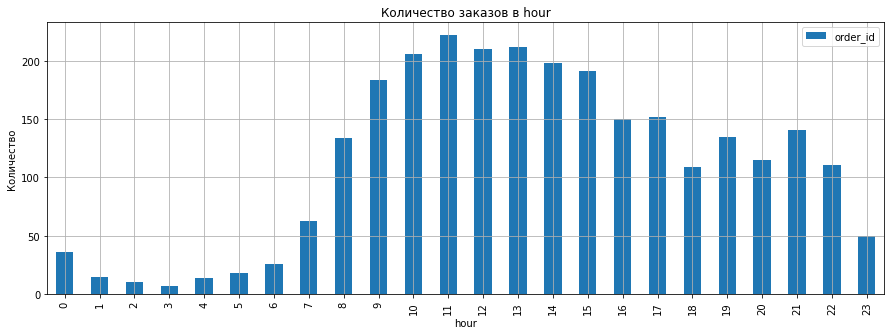

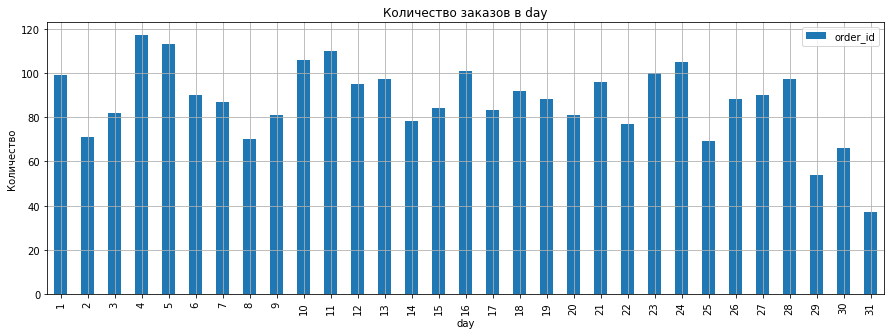

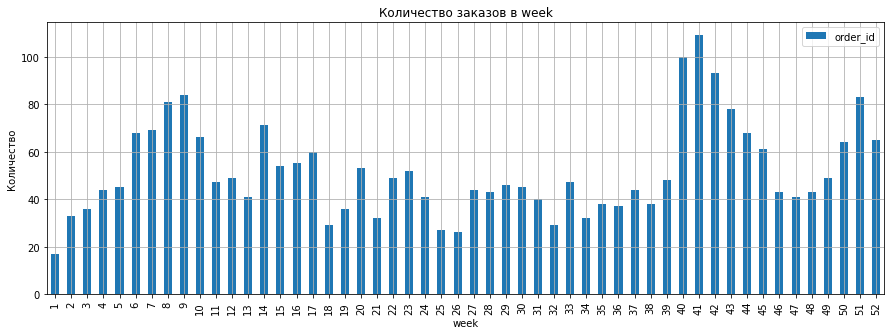

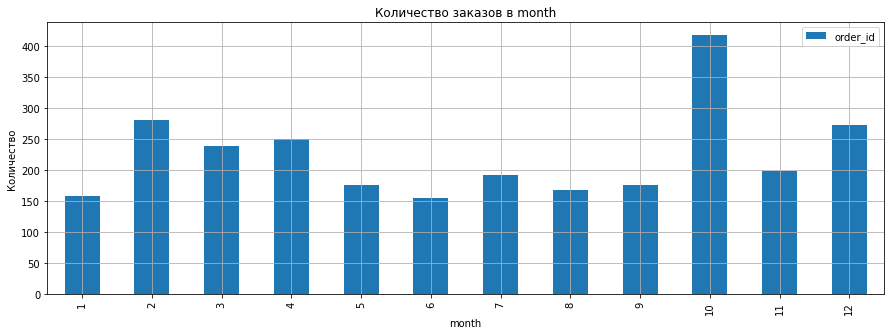

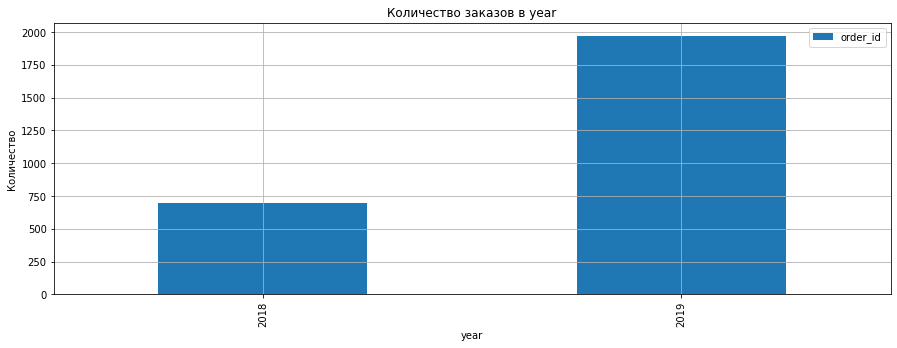

In [25]:

for n, columns in enumerate(['hour', 'day','week', 'month','year']):
    (df
     .pivot_table(index=columns, values='order_id', aggfunc='nunique')
     .plot(kind='bar', grid=True, figsize=(15, 5), y=['order_id']))
    plt.title('Количество заказов в ' + columns)
    plt.ylabel('Количество')
    plt.xlabel(columns)

<b> Судя по гистограмме, существует большая сезонность. В 2019 году было сделано значительно больше заказов чем в 2018. Больше всего продаж в октябре, меньше всего в июне. Чаще всего заказы сделаны в промежутке от 9 - 13:00.

<a id='3.3-bullet'></a>
## Посмотрим на самые популярные продукты по заказам.

,order_id
processed_product,
сушилка белья,258
пеларгония зональная,144
пеларгония розебудная,135
гладильная доска,113
сумкатележка хозяйственная,107


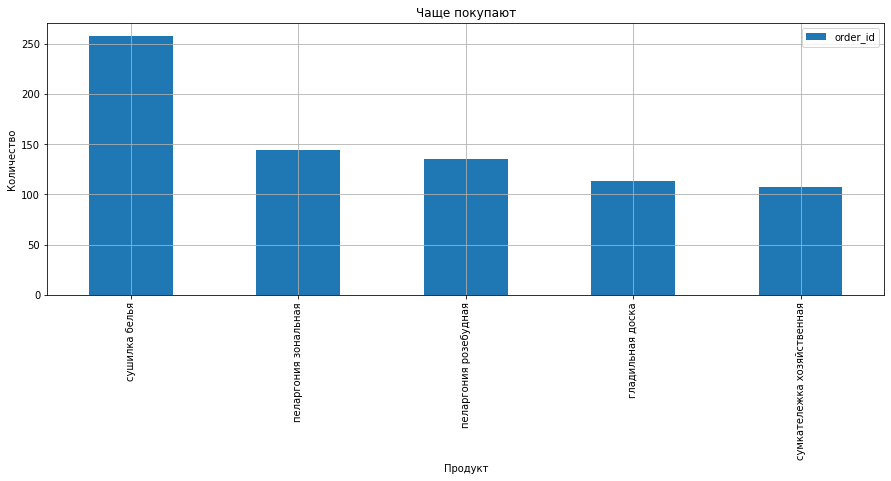

In [26]:
# Посмотрим на самые популярные продукты по заказам.
top_sales_number = df.pivot_table(index='processed_product', values='order_id', aggfunc='nunique').sort_values(by = 'order_id', ascending = False).head()

display(top_sales_number)

top_sales_number.plot.bar(grid=True, figsize=(15, 5))
plt.title('Чаще покупают')
plt.ylabel('Количество')
plt.xlabel('Продукт')
plt.show()

,order_id
product_category,
растения,961
всё для дома,554
декор,297


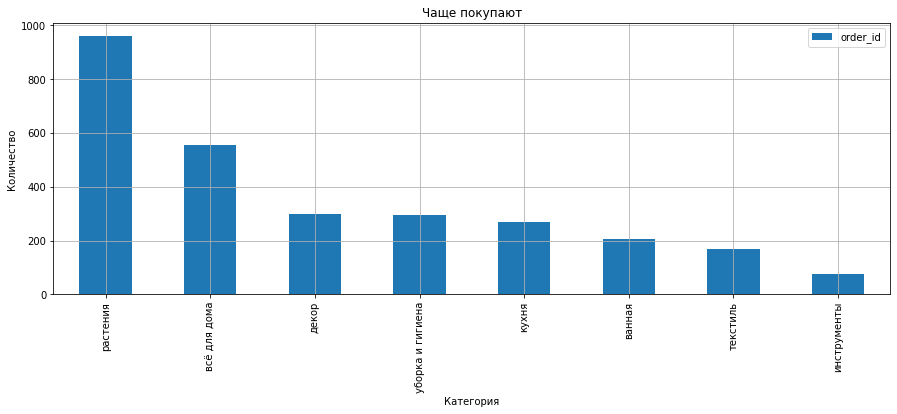

In [27]:
# Посмотрим на самые популярные группы продуктов по заказам.
top_sales_number = df.pivot_table(index='product_category', values='order_id', aggfunc='nunique').sort_values(by = 'order_id', ascending = False)

display(top_sales_number.head(3))

top_sales_number.plot.bar(grid=True, figsize=(15, 5))
plt.title('Чаще покупают')
plt.ylabel('Количество')
plt.xlabel('Категория')
plt.show()

In [28]:
# Посмотрим на те продукты, что реже покупают..
lowest_sales_number = df.pivot_table(index='product_category', values='order_id', aggfunc='nunique').sort_values(by = 'order_id').head(3)
lowest_sales_number

,order_id
product_category,
инструменты,74
текстиль,167
ванная,207


In [29]:
# Посмотрим на те продукты, что реже покупают..
lowest_sales_number = df.pivot_table(index='processed_product', values='order_id', aggfunc='nunique').sort_values(by = 'order_id', ascending = False).query('order_id < 2')
print('Количество продуктов с одной продажей:',lowest_sales_number['order_id'].sum())

Количество продуктов с одной продажей: 520


<b> 
Чаще всего покупают товары: 
    
    * сушилка белья - 258
    * пеларгония зональная - 144
    * пеларгония розебудная - 135
    * гладильная доска - 113
    * сумкатележка хозяйственная - 107
    
Чаще всего покупают товары из категории: 
    
    * растения - 961
    * всё для дома - 554
    * декор - 297
    
Реже покупают товары из категории:
    
    * инструменты - 74
    * текстиль - 167
    * ванная - 207
	

При этом есть 520 товаров у которых только 1 продажа. 

<a id='3.4-bullet'></a>
## Как распределены категории товаров по чекам?

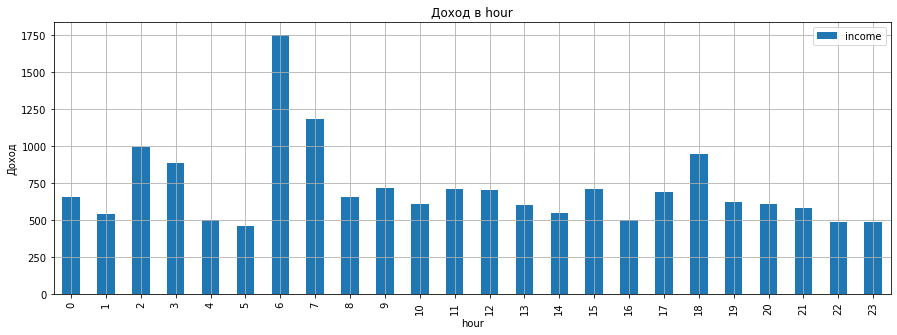

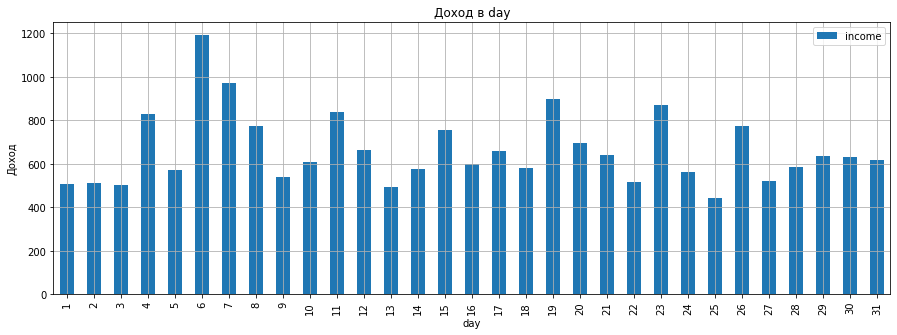

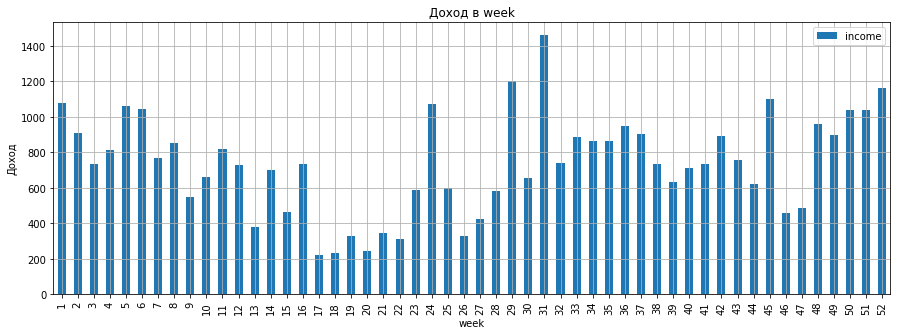

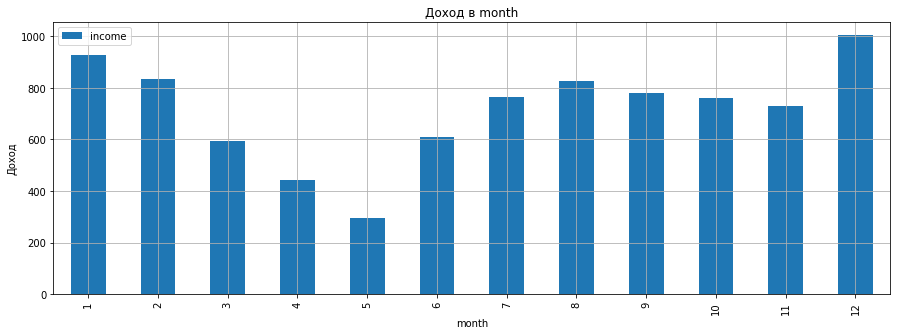

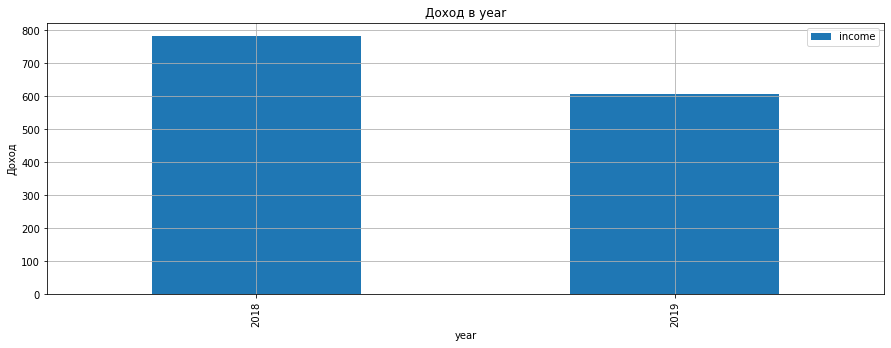

In [30]:
# Для начала посмтрим на средний доход во времени
for n, columns in enumerate(['hour', 'day','week', 'month','year']):
    (df
     .pivot_table(index=columns, values='income', aggfunc = 'mean')
     .plot(kind='bar', grid=True, figsize=(15, 5), y=['income']))
    plt.title('Доход в ' + columns)
    plt.ylabel('Доход')
    plt.xlabel(columns)

<b>
Средний доход больше в 2018 году при том, что заказов больше в 2019. Возможно связано с большей продажей дорогих продуктов

Больше всего дохода приносят:


,product_category,income
0,всё для дома,1612.291118
1,инструменты,1466.587500
2,уборка и гигиена,1262.018462
3,текстиль,1150.668508
4,ванная,1045.668161


Меньше всего дохода приносят:


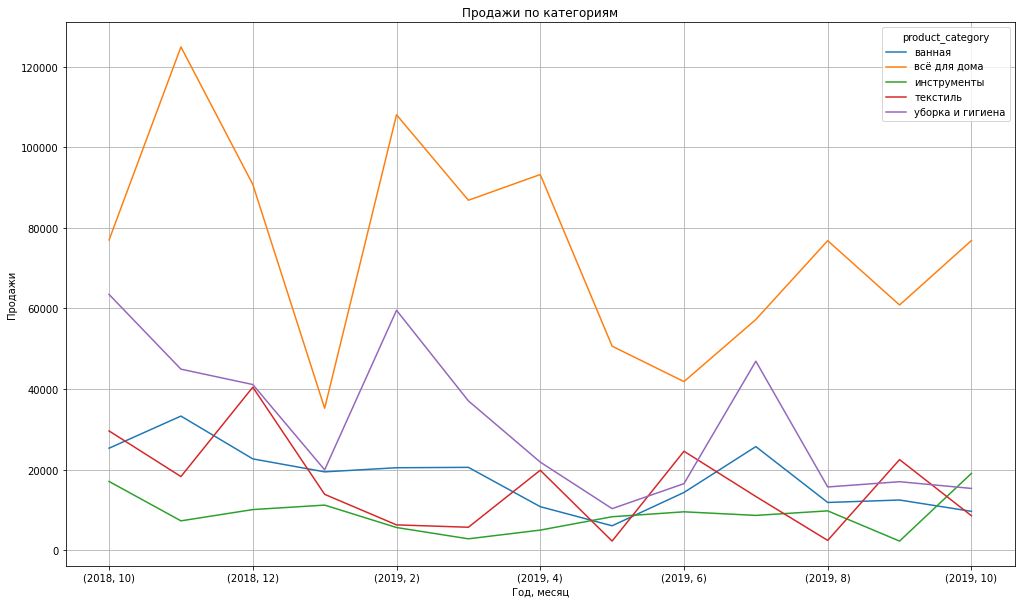

In [31]:
# Посмотрим на доход по категориям
mean_sales = df.pivot_table(index = 'product_category', values = 'income').sort_values(by = 'income', ascending = False).reset_index()

print('Больше всего дохода приносят:')
display(mean_sales.head())
top_category = mean_sales.head()
top_category = top_category['product_category'].to_list()

print('Меньше всего дохода приносят:')
mean_sales.tail()


product_category_pivot = (df[df['product_category'].isin(top_category)]
                  .pivot_table(index=['year','month'], columns='product_category', values='income', aggfunc='sum')
)

product_category_pivot.plot(figsize=(17,10),grid=True)
plt.title("Продажи по категориям")
plt.ylabel('Продажи')
plt.xlabel('Год, месяц')
plt.show()

<b>
Видим значительное увеличение спроса на товары для дома в конце 2018 с сильным падением к январю 2019 и взлетом к февралю, в то время как спрос на текстиль увеличивается в январе и падает в феврале. 

<a id='3.5-bullet'></a>
## Посмотрим на отношение количества покупок товара к доходу.

In [32]:

product_pivot = (df
                  .pivot_table(index='processed_product', values=['price','income'], aggfunc={'price':'first',
                                                                                              'processed_product':'count', 
                                                                                              'income': 'sum'})
                 .rename(columns={'processed_product': 'count'})
                 
)
product_pivot.describe()

,income,price,count
count,925.000000,925.000000,925.000000
mean,3291.604324,482.924324,5.058378
std,19034.709598,956.325991,20.784059
min,9.000000,9.000000,1.000000
25%,186.000000,75.000000,1.000000
50%,525.000000,149.000000,1.000000
75%,1648.000000,449.000000,3.000000
max,393183.000000,14917.000000,362.000000


In [33]:
print('Товары которые продаются часто но приносят мало прибыли:')
product_pivot.query('income < 186 & count > 3').reset_index()

Товары которые продаются часто но приносят мало прибыли:


,processed_product,income,price,count
0,базилик пурпурные,115.0,15.0,4


In [34]:
print('Товары которые продаются часто и приносят много прибыли:')
product_pivot.query('income > 1660 & count > 3').reset_index().sort_values(by = 'income', ascending = False).head()

Товары которые продаются часто и приносят много прибыли:


,processed_product,income,price,count
89,сумкатележка хозяйственная,393183.0,1874.0,111
90,сушилка белья,275770.0,614.0,266
11,гладильная доска,218336.0,1349.0,113
86,сумкатележка NUM,164955.0,1049.0,102
111,штора ванной,75103.0,1199.0,62


In [35]:
print('Товары которые продаются редко но приносят много прибыли:')
product_pivot.query('income > 1660 & count < 2').reset_index().sort_values(by = 'income', ascending = False).head()

Товары которые продаются редко но приносят много прибыли:


,processed_product,income,price,count
43,сушилка уличная,14917.0,14917.0,1
20,наматрацник nature,14196.0,1183.0,1
36,скатерть круглая,11400.0,1140.0,1
41,спатифиллум свит,8810.0,1762.0,1
37,скатерть рим,7496.0,1874.0,1


In [36]:
print('Товары которые продаются редко и приносят мало прибыли:')
product_pivot.query('income < 186 & count < 2').reset_index().sort_values(by = 'income').head()

Товары которые продаются редко и приносят мало прибыли:


,processed_product,income,price,count
35,горох амброзия,9.0,9.0,1
121,огурец засолочный,10.0,10.0,1
130,петрушка итальянский,10.0,10.0,1
181,цинния коралловая,10.0,10.0,1
111,незабудка смесь,10.0,10.0,1


<b>Вывод:
    
По товарам проданным за все время лучше всего по соотношению количества покупок к доходу:
    
    * сумкатележка хозяйственная
	* сушилка белья	
	* гладильная доска
	* сумкатележка NUM
	* штора ванной
    
Хуже всего по соотношению количества покупок к доходу:
    
    * горох амброзия
	* огурец засолочный
	* петрушка итальянский	

<a id='3.6-bullet'></a>
## Посмотрим на отношение количества покупок категории товара к доходу.

In [37]:

product_pivot = (df
                  .pivot_table(index='product_category', values=['price','income'], aggfunc={'price':'first',
                                                                                              'product_category':'count', 
                                                                                              'income': 'sum'})
                 .rename(columns={'product_category': 'count'})
                 
)
product_pivot.describe()

,income,price,count
count,8.000000,8.000000,8.000000
mean,380591.750000,1307.875000,584.875000
std,309990.614984,1868.726949,807.924402
min,117327.000000,29.000000,80.000000
25%,196972.750000,127.000000,212.500000
50%,220727.500000,456.500000,321.500000
75%,487878.000000,1499.000000,450.500000
max,980273.000000,4949.000000,2546.000000


In [38]:
print('Категории которые продаются часто но приносят мало прибыли:')
product_pivot.query('income < income.quantile(.25) & count > count.quantile(.75)').reset_index()

Категории которые продаются часто но приносят мало прибыли:


,product_category,income,price,count


In [39]:
print('Категории которые продаются часто и приносят много прибыли:')
product_pivot.query('income > income.quantile(.75) & count > count.quantile(.75)').reset_index().sort_values(by = 'income', ascending = False).head()

Категории которые продаются часто и приносят много прибыли:


,product_category,income,price,count
0,всё для дома,980273.0,82.0,608
1,растения,721044.0,142.0,2546


In [40]:
print('Категории которые продаются редко но приносят много прибыли:')
product_pivot.query('income > income.quantile(.75) & count < count.quantile(.25)').reset_index().sort_values(by = 'income', ascending = False).head()

Категории которые продаются редко но приносят много прибыли:


,product_category,income,price,count


In [41]:
print('Категории которые продаются редко и приносят мало прибыли:')
product_pivot.query('income < income.quantile(.25) & count < count.quantile(.25)').reset_index().sort_values(by = 'income').head()

Категории которые продаются редко и приносят мало прибыли:


,product_category,income,price,count
0,инструменты,117327.0,4949.0,80


<b>Вывод:
    
По групам товаров проданным за все время лучше всего по соотношению количества покупок к доходу:
    
    * всё для дома
	* растения
    
Хуже всего по соотношению количества покупок к доходу:
    
    * инструменты

<a id='3.7-bullet'></a>
## Как сезонность влияет на продажи?

In [42]:
# Для начала напишем функцию, которая распределит месяцы по сезонам.
def seasons(month):
    if 2 <= month == 12:
        return 'зима'
    elif 3 <= month <= 5:
        return 'весна'
    elif 6 <= month <= 8:
        return 'лето'
    else: 
        return 'осень'

In [43]:
df['seasons'] = df['month'].apply(seasons)
df.head()

,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income,processed_product,product_category,seasons
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,0,1,40,10,2018,142.0,комнатное растение,растения,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,0,1,40,10,2018,194.0,комнатное растение,растения,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,0,1,40,10,2018,112.0,радермахера d,растения,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,0,1,40,10,2018,179.0,хризолидокарпус лутесценс,растения,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,0,1,40,10,2018,112.0,циперус зумула,растения,осень


product_category,ванная,всё для дома,декор,инструменты,кухня,растения,текстиль,уборка и гигиена
seasons,,,,,,,,
весна,37,125,97,13,47,301,24,58
зима,25,56,31,9,36,67,25,28
лето,47,118,51,12,37,198,21,46
осень,98,257,119,40,149,396,97,162


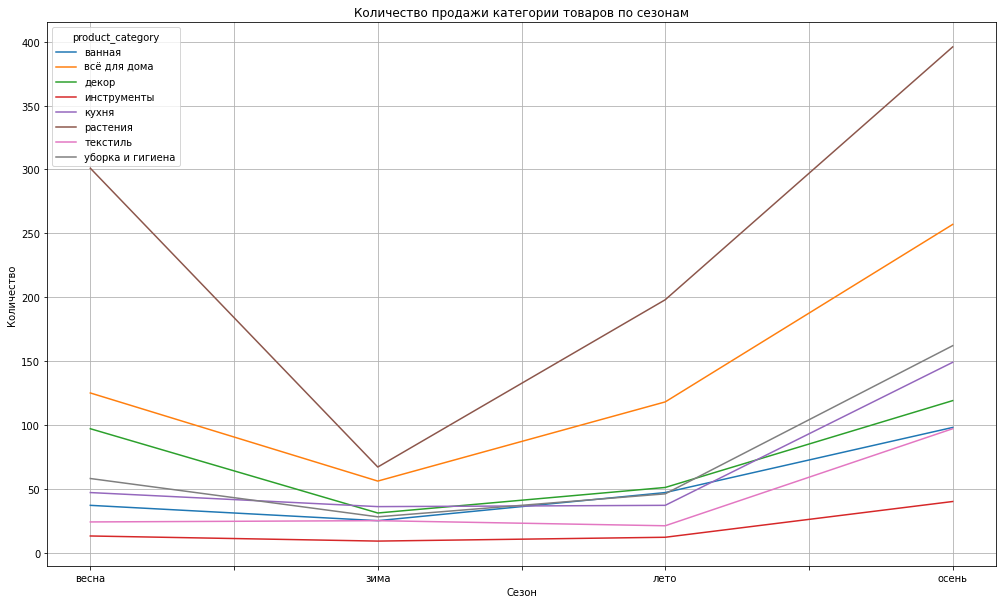

product_category,ванная,всё для дома,декор,инструменты,кухня,растения,текстиль,уборка и гигиена
seasons,,,,,,,,
весна,37575.0,230715.0,51797.0,16287.0,33497.0,270738.0,27969.0,69362.0
зима,22708.0,90759.0,24828.0,10135.0,24416.0,49865.0,40486.0,41144.0
лето,52027.0,175946.0,21458.0,28090.0,19481.0,147627.0,40477.0,79237.0
осень,120874.0,482853.0,69690.0,62815.0,129312.0,252814.0,99339.0,220413.0


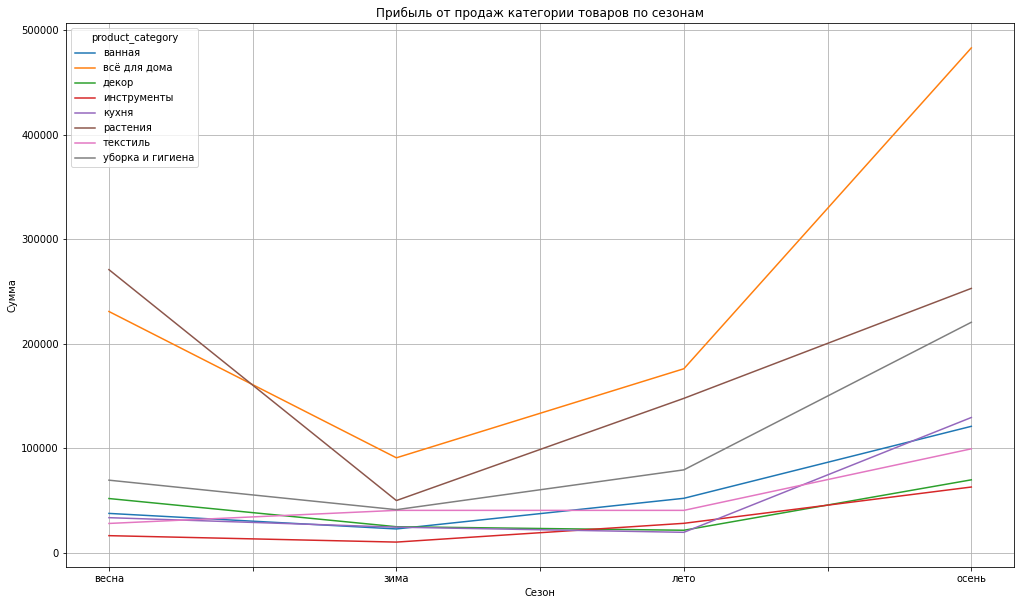

In [44]:
# Для начала посмотрим на продажи категории по сезонам
sales_pivot = (df
               .pivot_table( index = 'seasons', columns = 'product_category', values = 'order_id', aggfunc = {'order_id': 'nunique'} )
               )
display(sales_pivot)

sales_pivot.plot(figsize=(17,10),grid=True)
plt.title("Количество продажи категории товаров по сезонам")
plt.ylabel('Количество')
plt.xlabel('Сезон')
plt.show()

# Посмотрим на доход категории по сезонам
sales_pivot = (df
               .pivot_table( index = 'seasons', columns = 'product_category', values = 'income', aggfunc = {'income': 'sum'} )
               )
display(sales_pivot)

sales_pivot.plot(figsize=(17,10),grid=True)
plt.title("Прибыль от продаж категории товаров по сезонам")
plt.ylabel('Сумма')
plt.xlabel('Сезон')
plt.show()

<b>Вывод:
* Меньше всего количество продаж зимой по всем категориям товаров. Летом продажи возрастают. Пик продаж осень, весной снова начинают падать. Инструменты продаются стабильно низко во всех сезонах.
* По доходу ситуация аналогичная.
* Максимальное влияние фактора сезонности испытывают категории 'всё для дома' и 'растения'. При том, что товары для дома продаются гораздо меньше чем растения, они приносят гораздо больше прибыли. 

<a id='3.8-bullet'></a>
## Посмотрим на самые популярные товары по категориям.

In [45]:
# теперь посмотрим на самые прибыльные
top_product_by_cat = (df
                     .groupby('product_category')
                     .agg({'processed_product':'first', 'order_id':'nunique', 'customer_id':'nunique', 'income':'sum'})
                     .sort_values(by='order_id', ascending=False)
                     .reset_index())
                     
top_product_by_cat

,product_category,processed_product,order_id,customer_id,income
0,растения,комнатное растение,961,865,721044.0
1,всё для дома,вешалка брюк,554,514,980273.0
2,декор,муляж райские,297,286,167773.0
3,уборка и гигиена,настенная сушилка,294,267,410156.0
4,кухня,минисковорода marmiton,268,256,206706.0
5,ванная,ерш туалета,207,192,233184.0
6,текстиль,чехол гладильной,167,150,208271.0
7,инструменты,стремянка алюминиевая,74,72,117327.0


<a id='3.9-bullet'></a>
## Разбор аномальных значений

In [46]:
# Стоит отдельно разобрать аномально большие закупки
df.describe()
df.head()

,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income,processed_product,product_category,seasons
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,0,1,40,10,2018,142.0,комнатное растение,растения,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,0,1,40,10,2018,194.0,комнатное растение,растения,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,0,1,40,10,2018,112.0,радермахера d,растения,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,0,1,40,10,2018,179.0,хризолидокарпус лутесценс,растения,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,0,1,40,10,2018,112.0,циперус зумула,растения,осень


In [47]:
anomaly = df[df['quantity'] > 17].sort_values(by='customer_id')
print(anomaly['order_id'].nunique())
anomaly

37


,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income,processed_product,product_category,seasons
1677,2019-02-25 09:00:00,075873aa-644c-4a09-9253-204f3156ac7b,70438,"ёрш унитазный с деревянной ручкой , ваир 1712012",20,56.0,9,25,9,2,2019,1120.0,ёрш унитазный,ванная,осень
4529,2019-10-01 17:00:00,0a4012b7-9b6b-4a28-b564-09d14ffbe826,72826,половник attribute blossom пластик agb305,20,83.0,17,1,40,10,2019,1660.0,половник attribute,уборка и гигиена,осень
3752,2019-06-21 21:00:00,0e117bc7-82df-474f-a5db-0c50f16701f1,71770,муляж банан желтый 21 см полиуретан,25,51.0,21,21,25,6,2019,1275.0,муляж банан,декор,лето
4701,2019-10-25 13:00:00,14cc96d3-7d14-4e84-9c15-76e57b642c72,73092,цветок искусственный нарцисс одиночный в ассор...,25,20.0,13,25,43,10,2019,500.0,цветок искусственный,декор,осень
1421,2019-02-04 16:00:00,3bec2677-1f86-4f83-8076-c7db726032d0,70095,"муляж яблоко, оранжевый, 8,5 см, полиуретан",25,51.0,16,4,6,2,2019,1275.0,муляж яблоко,декор,осень
159,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж апельсин 8 см полиуретан,25,51.0,14,10,41,10,2018,1275.0,муляж апельсин,растения,осень
160,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж яблоко зеленый 9 см полиуретан,25,51.0,14,10,41,10,2018,1275.0,муляж яблоко,декор,осень
150,2018-10-09 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68585,"крючок одежный тройной латунь (б-47), 1110182",25,57.0,11,9,41,10,2018,1425.0,крючок одежный,всё для дома,осень
1546,2019-02-15 09:00:00,5640e9d8-47d5-472b-95b5-39dad4ea35ae,70270,нетканые салфетки в рулоне 70 шт eurohouse eh4967,20,106.0,9,15,7,2,2019,2120.0,нетканые салфетки,декор,осень
1591,2019-02-18 15:00:00,61f60726-5362-44d0-a0ae-800730389f32,70327,эхинокактус грузони d-5 см,29,74.0,15,18,8,2,2019,2146.0,эхинокактус грузони,декор,осень


In [48]:
anomaly_customers = df[df['customer_id'].isin(anomaly['customer_id'])].sort_values(by='customer_id')
print(anomaly_customers['order_id'].nunique())
anomaly_customers

68


,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income,processed_product,product_category,seasons
1677,2019-02-25 09:00:00,075873aa-644c-4a09-9253-204f3156ac7b,70438,"ёрш унитазный с деревянной ручкой , ваир 1712012",20,56.0,9,25,9,2,2019,1120.0,ёрш унитазный,ванная,осень
4529,2019-10-01 17:00:00,0a4012b7-9b6b-4a28-b564-09d14ffbe826,72826,половник attribute blossom пластик agb305,20,83.0,17,1,40,10,2019,1660.0,половник attribute,уборка и гигиена,осень
3752,2019-06-21 21:00:00,0e117bc7-82df-474f-a5db-0c50f16701f1,71770,муляж банан желтый 21 см полиуретан,25,51.0,21,21,25,6,2019,1275.0,муляж банан,декор,лето
4701,2019-10-25 13:00:00,14cc96d3-7d14-4e84-9c15-76e57b642c72,73092,цветок искусственный нарцисс одиночный в ассор...,25,20.0,13,25,43,10,2019,500.0,цветок искусственный,декор,осень
1421,2019-02-04 16:00:00,3bec2677-1f86-4f83-8076-c7db726032d0,70095,"муляж яблоко, оранжевый, 8,5 см, полиуретан",25,51.0,16,4,6,2,2019,1275.0,муляж яблоко,декор,осень
159,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж апельсин 8 см полиуретан,25,51.0,14,10,41,10,2018,1275.0,муляж апельсин,растения,осень
160,2018-10-10 14:00:00,3e2c8193-3fc0-4607-a59f-bcdf169ce351,68599,муляж яблоко зеленый 9 см полиуретан,25,51.0,14,10,41,10,2018,1275.0,муляж яблоко,декор,осень
245,2018-10-15 16:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68656,"сушилка для белья потолочная лиана 1,7 м 1703006",1,562.0,16,15,42,10,2018,562.0,сушилка белья,растения,осень
246,2018-10-15 17:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68659,чайник эмалированный metalloni со свистком и к...,1,862.0,17,15,42,10,2018,862.0,чайник эмалированный,кухня,осень
248,2018-10-16 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68661,штора для ванной комнаты diamante 240х200 см б...,4,1199.0,11,16,42,10,2018,4796.0,штора ванной,ванная,осень


<b>Вывод:
Из таблицы можно сделать вывод, что большая часть  аномальных покупателей является повторными. При этом других объединяющих признаков они не имеют. Можно предположить, что это покупатели перед большой покупкой сделали малые (контрольные).

<a id='3.10-bullet'></a>
## Промежуточные выводы:
<b>
Мы провели леммантизацию и распределили товары по группам и выяснили:
    
* Cуществует большая сезонность. В 2019 году было сделано значительно больше заказов чем в 2018. Больше всего продаж в октябре, меньше всего в июне. Чаще всего заказы сделаны в промежутке от 9 - 13:00.
* Чаще всего покупают товары:
    * сушилка белья
    * пеларгония зональная
    * пеларгония розебудная
    * гладильная доска
    * сумкатележка хозяйственная
* Больше всего покупают товары из категории:
    * растения
    * всё для дома
    * декор   
* Реже покупают товары из категории:
    * инструменты
    * текстиль
    * ванная   
* Средний доход больше в 2018 году при том, что заказов больше в 2019. Возможно связано с большей продажей дорогих продуктов
* Существует значительное увеличение спроса на товары для дома в конце 2018 с сильным падением к январю 2019 и взлетом к февралю, в то время как спрос на текстиль увеличивается в январе и падает в феврале.
* По товарам проданным за все время лучше всего по соотношению количества покупок к доходу:    
    * сумкатележка хозяйственная
	* сушилка белья	
	* гладильная доска
	* сумкатележка
	* пеларгония зональная    
* Хуже всего по соотношению количества покупок к доходу:    
    * горох амброзия
	* незабудка смесь
	* огурец засолочный
* По товарам проданным за все время лучше всего по соотношению количества покупок к доходу:
    * всё для дома
    * растения
* Хуже всего по соотношению количества покупок к доходу:
    * инструменты
* Меньше всего количество продаж зимой по всем категориям товаров. Летом продажи возрастают. Пик продаж осень, весной снова начинают падать. Инструменты продаются стабильно низко во всех сезонах.
* По доходу ситуация аналогичная.
* Максимальное влияние фактора сезонности испытывают категории 'всё для дома' и 'растения'. При том, что товары для дома продаются гораздо меньше чем растения, они приносят гораздо больше прибыли.
* Большая часть  аномальных покупателей является повторными. При этом других объединяющих признаков они не имеют. Можно предположить, что это покупатели перед большой покупкой сделали малые (контрольные).

<a id='4.1-bullet'></a>
# Часть 4. Кластеризация товаров:

In [49]:
df.head()

,date,customer_id,order_id,product,quantity,price,hour,day,week,month,year,income,processed_product,product_category,seasons
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,0,1,40,10,2018,142.0,комнатное растение,растения,осень
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,0,1,40,10,2018,194.0,комнатное растение,растения,осень
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,0,1,40,10,2018,112.0,радермахера d,растения,осень
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,0,1,40,10,2018,179.0,хризолидокарпус лутесценс,растения,осень
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,0,1,40,10,2018,112.0,циперус зумула,растения,осень


In [50]:
# Сделаем срез по нужным данным
data = (df
        .pivot_table( index = 'product' , aggfunc= {'order_id': 'nunique',
                                                              'customer_id': 'nunique',
                                                              'quantity': 'sum',
                                                              'price': 'first',
                                                              'income': 'sum'})
       .rename(columns = {'order_id' : 'order_number',
                         'customer_id' : 'customer_number'})
       )
data.head()

,customer_number,income,order_number,price,quantity
product,,,,,
tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,1,2399.0,1
tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,1,2399.0,1
tepмокружка avex recharge 500 мл голубой avex0681,2,4198.0,2,2324.0,2
автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114,1,7229.0,1,7229.0,1
агератум рассада однолетних цветов в кассете по 10 шт,1,420.0,1,210.0,2


<a id='4.1-bullet'></a>
## Стандартизируем данные.

In [51]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(data)

<a id='4.2-bullet'></a>
## Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

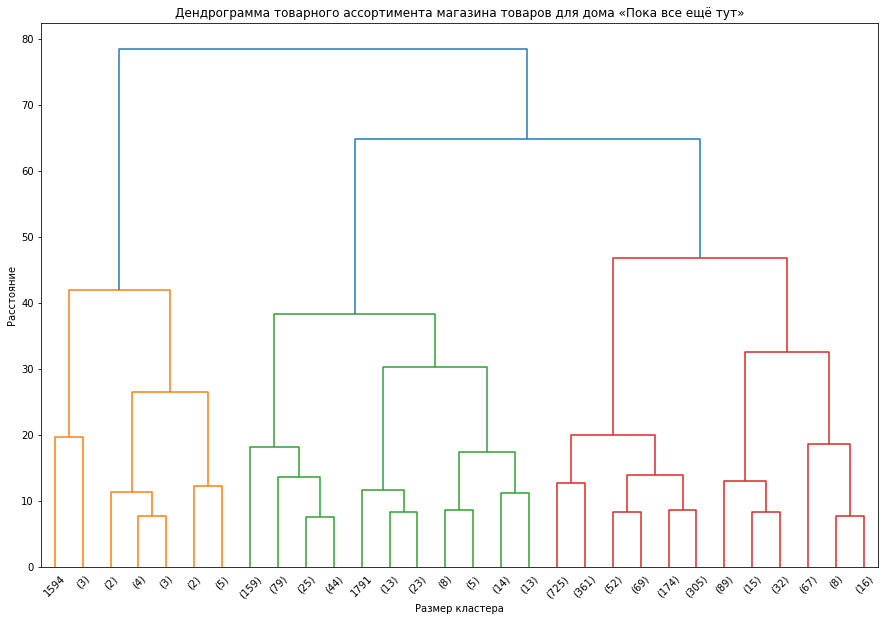

In [52]:
# Сохраняем таблицу связок между объектами в переменную linked и рисуем дендрограмму:
linked = linkage(x_sc, method = 'ward') 
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top', truncate_mode='lastp')
plt.title('Дендрограмма товарного ассортимента магазина товаров для дома «Пока все ещё тут»')
plt.xlabel("Размер кластера")
plt.ylabel("Расстояние")
plt.show() 

<b> 
Судя по дендрограмме, датасет мошно поделить на 3 кластера.

<a id='4.3-bullet'></a>
## Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры товаров.

In [53]:
# задаём число кластеров, равное 3, и фиксируем значение random_state для воспроизводимости результата
km = KMeans(n_clusters=3, random_state=0)

# применяем алгоритм к данным и формируем вектор кластеров
labels = km.fit_predict(x_sc) 

# сохраняем метки кластера в поле нашего датасета
data['cluster_km'] = labels
data.head()

,customer_number,income,order_number,price,quantity,cluster_km
product,,,,,,
tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,1,2399.0,1,1
tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,1,2399.0,1,1
tepмокружка avex recharge 500 мл голубой avex0681,2,4198.0,2,2324.0,2,2
автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114,1,7229.0,1,7229.0,1,2
агератум рассада однолетних цветов в кассете по 10 шт,1,420.0,1,210.0,2,1


<a id='4.4-bullet'></a>
## Для каждого полученного кластера посчитаем и сравним средние значения

In [54]:
# выводим статистику по средним значениям наших признаков по кластеру
round(data.groupby('cluster_km').mean())

,customer_number,income,order_number,price,quantity
cluster_km,,,,,
0,18.0,5299.0,18.0,174.0,34.0
1,2.0,725.0,2.0,378.0,3.0
2,2.0,6630.0,2.0,3510.0,3.0


<a id='4.5-bullet'></a>
## Промежуточные выводы:

<b>
    
Обучив модель кластеризации на основании алгоритма K-Means, мы разбили товары на 3 кластера.
    
0 - В 0 кластер попали продукты с низкими продажами и низкой прибылью. Для них:
    
        * Среднее количество покупателей 18
        * Среднее количество заказов 18
        * Среднее количество товара в заказе 34
        * Среднеяя цена товара 174	
        * Средний доход на товар 5299
    
1 - В 1 кластер попали продукты с высокими продажами и средней прибылью. Для них:
    
        * Среднее количество покупателей 2
        * Среднее количество заказов 2
        * Среднее количество товара в заказе 3
        * Среднеяя цена товара 378
        * Средний доход на товар 725	
    
2 - Во 2 кластер попали продукты с низкими продажами но очень высокой прибылью. Для них:
    
        * Среднее количество покупателей 2	
        * Среднее количество заказов 2
        * Среднее количество товара в заказе 3
        * Среднеяя цена товара 3510	
        * Средний доход на товар 6630	
    
Рекомендую: 
    
    * Сильно сократить ассортимент из 1 кластера так как их покупают редко и приносят они не много прибыли. 
    * Больше ресурсов направить на увеличение ассортимента товаров из 0 кластера так как у них самое высокое количество продаж при хорошей доходности.
    * Товары из 3 кластера можно расширить не закупая при этом большое их количество. Это, в основном товары с высокой стоимостью.

In [55]:
data.head()

,customer_number,income,order_number,price,quantity,cluster_km
product,,,,,,
tepмокружка avex freeflow 700 мл зеленый avex0759,1,2399.0,1,2399.0,1,1
tepмокружка avex freeflow 700 мл сталь avex0776,1,2399.0,1,2399.0,1,1
tepмокружка avex recharge 500 мл голубой avex0681,2,4198.0,2,2324.0,2,2
автоматическая щетка leifheit для мытья окон с ручкой 43 см. 51114,1,7229.0,1,7229.0,1,2
агератум рассада однолетних цветов в кассете по 10 шт,1,420.0,1,210.0,2,1


<a id='5.1-bullet'></a>
# Часть 5. Проверка гипотез:

<a id='5.1-bullet'></a>
## Посчитаем статистическую значимость различии в среднем чеке по кластерам

Сформируем гипотезы:

H0 — Статистически значимых различий в среднем чеке магазина товаров для дома «Пока все ещё тут» между кластерами нет.
    
H1 — Есть статистически значимые различия в среднем чеке магазина товаров для дома «Пока все ещё тут» между кластерами.

alpha = 5%

In [56]:
# Создадим 3 совокупности данных 
cl0 = data[data['cluster_km']==0]['income']
cl1 = data[data['cluster_km']==1]['income']
cl2 = data[data['cluster_km']==2]['income']

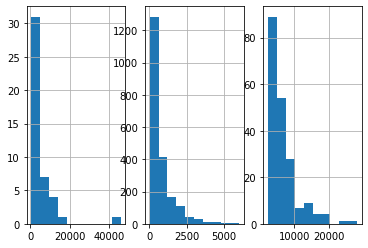

In [57]:
# Посмотрим как они распределены
fig = plt.figure()
axes = fig.subplots(nrows=1, ncols=3)

cl0.hist(ax =axes[0], )
cl1.hist(ax =axes[1], )
cl2.hist(ax =axes[2], )
plt.show()

<b> Имеем не равномерное распределение. Выбираю непараметрический тест Уилкоксона-Манна-Уитни

In [58]:
# Выполним проверку гипотезы для кластеров 0 и 1
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cl0, cl1) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 3.0393206939430804e-23
Отвергаем нулевую гипотезу


In [59]:
# Выполним проверку гипотезы для кластеров 0 и 2
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cl0, cl2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.8373690533824652e-05
Отвергаем нулевую гипотезу


In [60]:
# Выполним проверку гипотезы для кластеров 1 и 2
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cl1, cl2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.372482712214106e-115
Отвергаем нулевую гипотезу


<b>Вывод:
    
Имеем статистически значимые различия в среднем чеке магазина товаров для дома «Пока все ещё тут» между кластерами.

<a id='5.2-bullet'></a>
## Посчитаем статистическую значимость различии в количестве покупателей по кластерам

Сформируем гипотезы:

H0 — Статистически значимых различий в количестве покупателей магазина товаров для дома «Пока все ещё тут» между кластерами нет.
    
H1 — Есть статистически значимые различия в количестве покупателей магазина товаров для дома «Пока все ещё тут» между кластерами.

alpha = 5%

In [61]:
# Создадим 3 совокупности данных 
cl0 = data[data['cluster_km']==0]['customer_number']
cl1 = data[data['cluster_km']==1]['customer_number']
cl2 = data[data['cluster_km']==2]['customer_number']

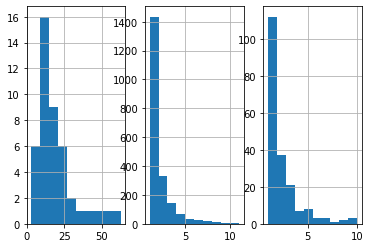

In [62]:
# Посмотрим как они распределены
fig = plt.figure()
axes = fig.subplots(nrows=1, ncols=3)

cl0.hist(ax =axes[0] )
cl1.hist(ax =axes[1])
cl2.hist(ax =axes[2])
plt.show()

<b> Имеем не равномерное распределение. Выбираю непараметрический тест Уилкоксона-Манна-Уитни

In [63]:
# Выполним проверку гипотезы для кластеров 0 и 1
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cl0, cl1) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.344443356939618e-42
Отвергаем нулевую гипотезу


In [64]:
# Выполним проверку гипотезы для кластеров 0 и 2
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cl0, cl2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.431935599619845e-26
Отвергаем нулевую гипотезу


In [65]:
# Выполним проверку гипотезы для кластеров 1 и 2
alpha = 0.05 # критический уровень статистической значимости 
results = st.mannwhitneyu(cl1, cl2) 

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.00014380364809975086
Отвергаем нулевую гипотезу


<b>Вывод:
    
Ожидаемо имеем статистически значимые различия в количестве покупателей магазина товаров для дома «Пока все ещё тут» между кластерами.

<a id='5.3-bullet'></a>
## Промежуточные выводы:

* Имеем статистически значимые различия в среднем чеке магазина товаров для дома «Пока все ещё тут» между кластерами.
* Имеем статистически значимые различия в количестве покупателей магазина товаров для дома «Пока все ещё тут» между кластерами.

<a id='6-bullet'></a>
# Часть 6. Общий вывод:


[Изучив и подготовив данные мы получили:](#2.1-bullet)
* 4793 запись разделенные на 12 колонок. 
* Данные за период с 2018-10-01 по 2019-10-31. 
* Есть выбивающиеся, но возможные значения. Принял решение их удалить, так как, хотя их меньше 1%, могут сильно повлиять на результаты.

<b>
В ходе EDA: </b>

[Мы провели леммантизацию и распределили товары по группам и выяснили:](#3.1-bullet) 
* [В 2019 году было сделано значительно больше заказов чем в 2018. Больше всего продаж в октябре, меньше всего в июне. Чаще всего заказы сделаны в промежутке от 9 - 13:00.](#3.2-bullet) 
* [Чаще всего покупают товары:](#3.3-bullet)

    * сушилка белья - 258
    * пеларгония зональная - 144
    * пеларгония розебудная - 135
    * гладильная доска - 113
    * сумкатележка хозяйственная - 107

* Чаще всего покупают товары из категории: 

    * растения - 961
    * всё для дома - 554
    * декор - 297
    
* Реже покупают товары из категории:
    
    * инструменты - 74
    * текстиль - 167
    * ванная - 207
	
    
При этом есть 520 товаров у которых только 1 продажа. 
* [Средний доход больше в 2018 году при том, что заказов больше в 2019. Возможно связано с большей продажей дорогих продуктов](#3.4-bullet)
* Существует значительное увеличение спроса на товары для дома в конце 2018 с сильным падением к январю 2019 и взлетом к февралю, в то время как спрос на текстиль увеличивается в январе и падает в феврале.
* [По товарам проданным за все время лучше всего по соотношению количества покупок к доходу:](#3.5-bullet)
   
    * сумкатележка хозяйственная
	* сушилка белья	
	* гладильная доска
	* сумкатележка NUM
	* штора ванной
    
* Хуже всего по соотношению количества покупок к доходу:
    
    * горох амброзия
	* огурец засолочный
	* петрушка итальянский	
* [По групам товаров проданным за все время лучше всего по соотношению количества покупок к доходу:](#3.6-bullet)
    * всё для дома
    * растения
* Хуже всего по соотношению количества покупок к доходу:
    * инструменты
* [Меньше всего количество продаж зимой по всем категориям товаров. Летом продажи возрастают. Пик продаж осень, весной снова начинают падать. Инструменты продаются стабильно низко во всех сезонах.](#3.7-bullet)
* По доходу ситуация аналогичная.
* Максимальное влияние фактора сезонности испытывают категории 'всё для дома' и 'растения'. При том, что товары для дома продаются гораздо меньше чем растения, они приносят гораздо больше прибыли.
* Большая часть  аномальных покупателей является повторными. При этом других объединяющих признаков они не имеют. Можно предположить, что это покупатели перед большой покупкой сделали малые (контрольные).  

[Обучив модель кластеризации на основании алгоритма K-Means, мы разбили товары на 3 кластера.](#4.3-bullet)
    
0 - [В 0 кластер попали продукты с низкими продажами и низкой прибылью. Для них:](#4.4-bullet)

        * Среднее количество покупателей 18
        * Среднее количество заказов 18
        * Среднее количество товара в заказе 34
        * Среднеяя цена товара 174	
        * Средний доход на товар 5299
    
1 - В 1 кластер попали продукты с высокими продажами и средней прибылью. Для них:
    
        * Среднее количество покупателей 2
        * Среднее количество заказов 2
        * Среднее количество товара в заказе 3
        * Среднеяя цена товара 378
        * Средний доход на товар 725	
    
2 - Во 2 кластер попали продукты с низкими продажами но очень высокой прибылью. Для них:
    
        * Среднее количество покупателей 2	
        * Среднее количество заказов 2
        * Среднее количество товара в заказе 3
        * Среднеяя цена товара 3510	
        * Средний доход на товар 6630	
    
Рекомендую: 
    
    * Сильно сократить ассортимент из 1 кластера так как их покупают редко и приносят они не много прибыли. 
    * Больше ресурсов направить на увеличение ассортимента товаров из 0 кластера так как у них самое высокое количество продаж при хорошей доходности.
    * Товары из 3 кластера можно расширить не закупая при этом большое их количество. Это, в основном товары с высокой стоимостью.

<b>
В результате проверки гипотез </b>

* [Имеем статистически значимые различия в среднем чеке магазина товаров для дома «Пока все ещё тут» между кластерами.](#5.1-bullet)
* [Имеем статистически значимые различия в количестве покупателей магазина товаров для дома «Пока все ещё тут» между кластерами.](#5.2-bullet)

# Часть 6. Общие Рекомендации:


1 - Увеличить продажи:

    * Рекомендовать к покупке товары, которые чаще покупают вместе, комплектом.
    * Провести специальные акции и предложения для товаров в не сезоне.
2 - Увеличить поток клиентов:

    * Cозданть рекламу на самые востребованные товары в сезон.
    * Ввести програму лояльности.
    * Специальные предложения для постоянных клиентов.
3 - Оптимизировать закупки:

    * Разнообразить закупки товаров из 2 кластера. (Они продаются в меньшем количестве, но за счет цены приносят основной доход.)
    * Увеличить закупки товаров из 0 кластера. (Они хорошо продаются и приносят хороший доход.)
    * Максимально уменьшить товары из 1 кластера. (Они продаются редко и приносят мало прибыли.)
    * Учесть фактор сезонности на товары.

# [Вернуться к началу.](#31-bullet)

df.to_csv('df.csv', index = False)